In [ ]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation
from keras.layers import LSTM
from keras.optimizers import Adam,RMSprop
from keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPooling1D
from tensorflow.keras.utils import plot_model

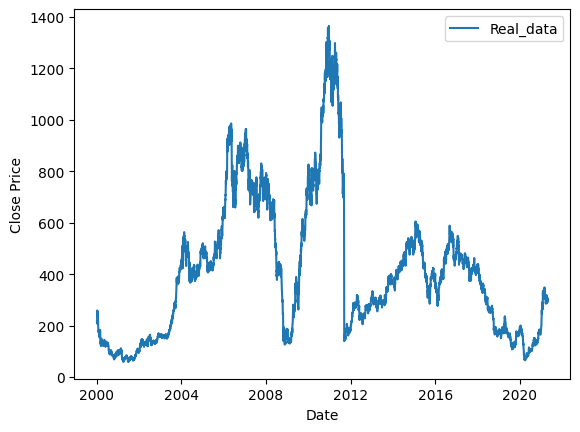

In [ ]:
dataframe = pd.read_csv('/content/TATAMOTORS.csv', index_col=False)
plt.plot(pd.to_datetime(dataframe['Date'],format='%d-%m-%Y'), dataframe['Close'],label='Real_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
dataframe.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
df = dataframe.drop(['Date', 'Symbol', 'Series',  'Unnamed: 12', 'Unnamed: 13'], axis=1)
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,201.60,207.4,217.25,207.40,217.00,216.75,214.28,676126,1.448780e+13
1,216.75,217.0,219.00,206.00,211.90,208.20,209.50,679215,1.422960e+13
2,208.20,194.0,217.80,194.00,213.10,213.25,210.33,1120951,2.357680e+13
3,213.25,215.0,229.90,215.00,222.00,222.10,225.29,1968998,4.435930e+13
4,222.10,224.0,239.90,223.10,239.90,239.90,236.32,2199431,5.197640e+13
...,...,...,...,...,...,...,...,...,...
5301,294.00,297.0,299.00,294.60,295.85,295.40,296.48,30583139,9.067390e+14
5302,295.40,295.7,302.50,295.10,302.10,301.50,299.05,35040532,1.047880e+15
5303,301.50,303.5,309.50,303.00,305.15,305.90,307.22,44668126,1.372280e+15
5304,305.90,308.9,310.00,301.25,302.20,301.90,304.77,36647292,1.116900e+15


In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# Conversuin of our data to floats as it is more suitable for this neural networks
# print(dataframe)
dataset = df
print(dataset)
dataset = dataset.astype('float32')

      Prev Close   Open    High     Low    Last   Close    VWAP    Volume  \
0         201.60  207.4  217.25  207.40  217.00  216.75  214.28    676126   
1         216.75  217.0  219.00  206.00  211.90  208.20  209.50    679215   
2         208.20  194.0  217.80  194.00  213.10  213.25  210.33   1120951   
3         213.25  215.0  229.90  215.00  222.00  222.10  225.29   1968998   
4         222.10  224.0  239.90  223.10  239.90  239.90  236.32   2199431   
...          ...    ...     ...     ...     ...     ...     ...       ...   
5301      294.00  297.0  299.00  294.60  295.85  295.40  296.48  30583139   
5302      295.40  295.7  302.50  295.10  302.10  301.50  299.05  35040532   
5303      301.50  303.5  309.50  303.00  305.15  305.90  307.22  44668126   
5304      305.90  308.9  310.00  301.25  302.20  301.90  304.77  36647292   
5305      301.90  298.2  301.30  292.55  293.10  293.85  297.01  36121668   

          Turnover  
0     1.448780e+13  
1     1.422960e+13  
2     2.3576

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 8))

In [ ]:
from sklearn.model_selection import train_test_split
train = dataset[int(0.2*(dataset.shape[0])):int(0.8*(dataset.shape[0]))]
test = pd.concat([dataset.iloc[:int(0.2*(dataset.shape[0]))], dataset[int(0.8*(dataset.shape[0])):]])
# train = dataset[int(0.3*(dataset.shape[0])):]
# test = dataset.iloc[:int(0.3*(dataset.shape[0]))]
print(len(train), len(test))
print(train)

3183 2123
      Prev Close        Open        High         Low        Last       Close  \
1061  449.450012  457.200012  468.799988  455.250000  465.000000  466.350006   
1062  466.350006  469.899994  475.000000  452.500000  473.399994  472.950012   
1063  472.950012  475.250000  490.000000  468.000000  470.000000  469.500000   
1064  469.500000  471.399994  488.899994  468.000000  487.899994  485.850006   
1065  485.850006  482.549988  496.850006  482.549988  494.000000  494.700012   
...          ...         ...         ...         ...         ...         ...   
4239  502.149994  502.950012  507.950012  496.250000  498.549988  497.750000   
4240  497.750000  499.399994  504.600006  492.149994  501.250000  500.149994   
4241  500.149994  506.549988  518.000000  505.950012  517.900024  516.250000   
4242  516.250000  520.250000  523.950012  517.150024  518.849976  519.250000   
4243  519.250000  521.700012  524.000000  513.200012  519.150024  518.250000   

            VWAP     Volume  

In [ ]:
train

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
1061,449.450012,457.200012,468.799988,455.250000,465.000000,466.350006,463.630005,3243245.0,1.503650e+14
1062,466.350006,469.899994,475.000000,452.500000,473.399994,472.950012,465.359985,3233956.0,1.504950e+14
1063,472.950012,475.250000,490.000000,468.000000,470.000000,469.500000,473.640015,3378275.0,1.600100e+14
1064,469.500000,471.399994,488.899994,468.000000,487.899994,485.850006,479.559998,3212849.0,1.540740e+14
1065,485.850006,482.549988,496.850006,482.549988,494.000000,494.700012,490.679993,2931471.0,1.438410e+14
...,...,...,...,...,...,...,...,...,...
4239,502.149994,502.950012,507.950012,496.250000,498.549988,497.750000,501.970001,4907475.0,2.463420e+14
4240,497.750000,499.399994,504.600006,492.149994,501.250000,500.149994,500.220001,3932710.0,1.967230e+14
4241,500.149994,506.549988,518.000000,505.950012,517.900024,516.250000,512.979980,7973024.0,4.089970e+14
4242,516.250000,520.250000,523.950012,517.150024,518.849976,519.250000,519.849976,4886398.0,2.540170e+14


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 5])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = scaler.fit_transform(trainX.reshape(-1, 9))
testX = scaler.transform(testX.reshape(-1, 9))
print(testY)
# print(trainX)

[240.25 235.45 239.05 ... 301.5  305.9  301.9 ]


In [ ]:
trainX.shape

(22225, 9)

In [ ]:
# reshape input to be [samples, time steps, features]
print(trainX.shape)
trainX = numpy.reshape(trainX, (trainX.shape[0], -1))
testX = numpy.reshape(testX, (testX.shape[0], -1))

(22225, 9)


In [ ]:
trainX

array([[2.0872512 , 2.144951  , 2.1573896 , ..., 2.1738248 , 0.23342086,
        0.23702426],
       [2.1963758 , 2.2272248 , 2.1970568 , ..., 2.1850424 , 0.23274976,
        0.2372297 ],
       [2.2389927 , 2.2618835 , 2.293026  , ..., 2.2387316 , 0.24317631,
        0.25226554],
       ...,
       [2.4275393 , 2.4413314 , 2.4078693 , ..., 2.4224286 , 0.3536557 ,
        0.38868955],
       [2.3991282 , 2.4183333 , 2.386436  , ..., 2.4110813 , 0.2832323 ,
        0.31028038],
       [2.4146252 , 2.4646528 , 2.472169  , ..., 2.4938195 , 0.57513094,
        0.64572114]], dtype=float32)

In [ ]:
print(trainX.shape)
x_train2 = trainX.reshape(trainX.shape[0], -1)
print(x_train2.shape)
print(trainY.shape)
print(testX.shape)
x_test2 = testX.reshape(testX.shape[0], -1)
print(x_test2.shape)
# cnn.fit(x_train2, trainY, epochs=100, batch_size=1, verbose=2)

(22225, 9)
(22225, 9)
(3175,)
(14805, 9)
(14805, 9)


In [ ]:
len(x_train2)

22225

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 4)              12        
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 4, 4)             0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 30)                510       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
________________________________________________________

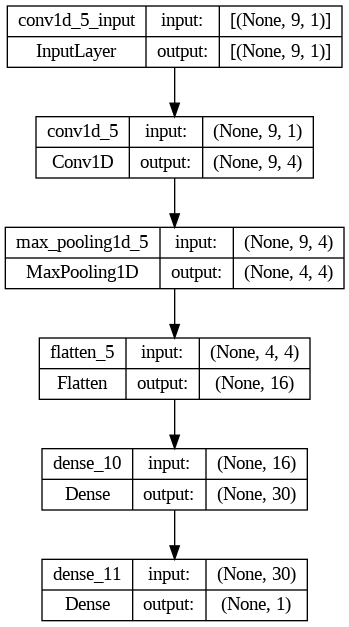

In [ ]:
cnn = Sequential()
cnn.add(Conv1D(4, kernel_size=2, strides=1,padding='same',
                 activation='relu',
                 input_shape=(len(x_train2[0]), 1)))
cnn.add(MaxPooling1D(pool_size=2))

cnn.add(Flatten())

cnn.add(Dense(30))
cnn.add(Dense(1))
cnn.summary()
cnn.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights_cnn.hdf5", verbose=0, save_best_only=True) # save best model
plot_model(cnn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
cnn.fit(x_train2,trainY, batch_size=10,verbose=2,epochs=20)

ValueError: ignored

In [ ]:
trainPredict = cnn.predict(x_train2)
testPredict = cnn.predict(x_test2)
# invert predictions
# print(trainPredict)
# trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# calculate root mean squared error



 **RMSE VALUE**

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[:], trainPredict[:]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:], testPredict[:]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
# print(len(testPredictPlot[-len(testPredict):, :]))
testPredictPlot[-len(testPredict):, :] = testPredict

**ACCURACY**

In [ ]:
target_range = testY.max() - testY.min()
accuracy_ratio = (1 - (testScore / target_range)) * 100
percentage_error = (testScore / target_range) * 100

print("RMSE:", testScore)
print("Accuracy Ratio:", accuracy_ratio)
print("Percentage Error:", percentage_error)

In [ ]:
# shift train predictions for plotting
dataframe1 = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Date'], index_col=False)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[-len(testPredict):, :] = testPredict
# plot baseline and predictions
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(30, 15)
fig.savefig('test2png.png',dpi=100)

# plt.plot(scaler.inverse_transform(dataset))

# plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),scaler.inverse_transform(dataset),label='Real_data')
plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),trainPredictPlot, color='purple',label='train_data')
plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),testPredictPlot, color='red',label='predict_data')

plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import matplotlib.dates as md
import mpl_finance as mpf
import matplotlib.pyplot as plt
import os
from datetime import datetime
Data_Predict=[]

Data_Predict = numpy.empty_like(dataset)
Data_Predict[:, :] = numpy.nan
Data_Predict[look_back:len(trainPredict)+look_back, :] = trainPredict
Data_Predict[-len(testPredict):, :] = testPredict
# Data_Predict[0:1, :] = dataframe[0:1, :]
# print(Data_Predict)
Close_Predict=[]
Data_Prepare=Data_Predict.tolist()
for sublist in Data_Prepare:
    for item in sublist:
        Close_Predict.append(item)
# print(Data_Predict1)
print(len(Close_Predict))
filename = '/content/TATAMOTORS.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    Date, Open, High, Low, Close = [], [], [], [], []
    print(reader)
    for row in reader:
        current_date = datetime.strptime(row[0], '%d-%m-%Y')
        Date.append(current_date)

        Close1 = float(row[4])
        Close.append(Close1)
#         print(Open)
#         High1 = float(row[1])
        High.append(140)

#         Low1 = float(row[2])
#         print(type(Low1))
        Low.append(140)

#         Close1 = float(row[4])
#         Close.append(Close_Predict)
#         print(Date)
# print(Low)
datas = []
for i in range(len(Date)):
    datas.append([md.date2num(Date[i]), float(Close[i]), float(High[i]), \
                 float(Low[i]), float(Close_Predict[i])])

47754


In [ ]:
# fig = plt.figure(2, dpi =128, figsize =(8,4))
# fig.set_size_inches(8, 4)
# ax2 = plt.subplot(111)
# ax2.set_title('Offset From CNN Model', fontsize =16)
# ax2.set_xlabel('Date', fontsize =16)
# ax2.set_ylabel('Price', fontsize =16)
# ax2.grid(True)
# ax2.xaxis_date()
# fig.autofmt_xdate()
# mpf.candlestick_ohlc(ax2, datas, width =0.6, colorup ='r', colordown ='g')

In [ ]:
scaler.transform(dataset).shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


(5306, 9)

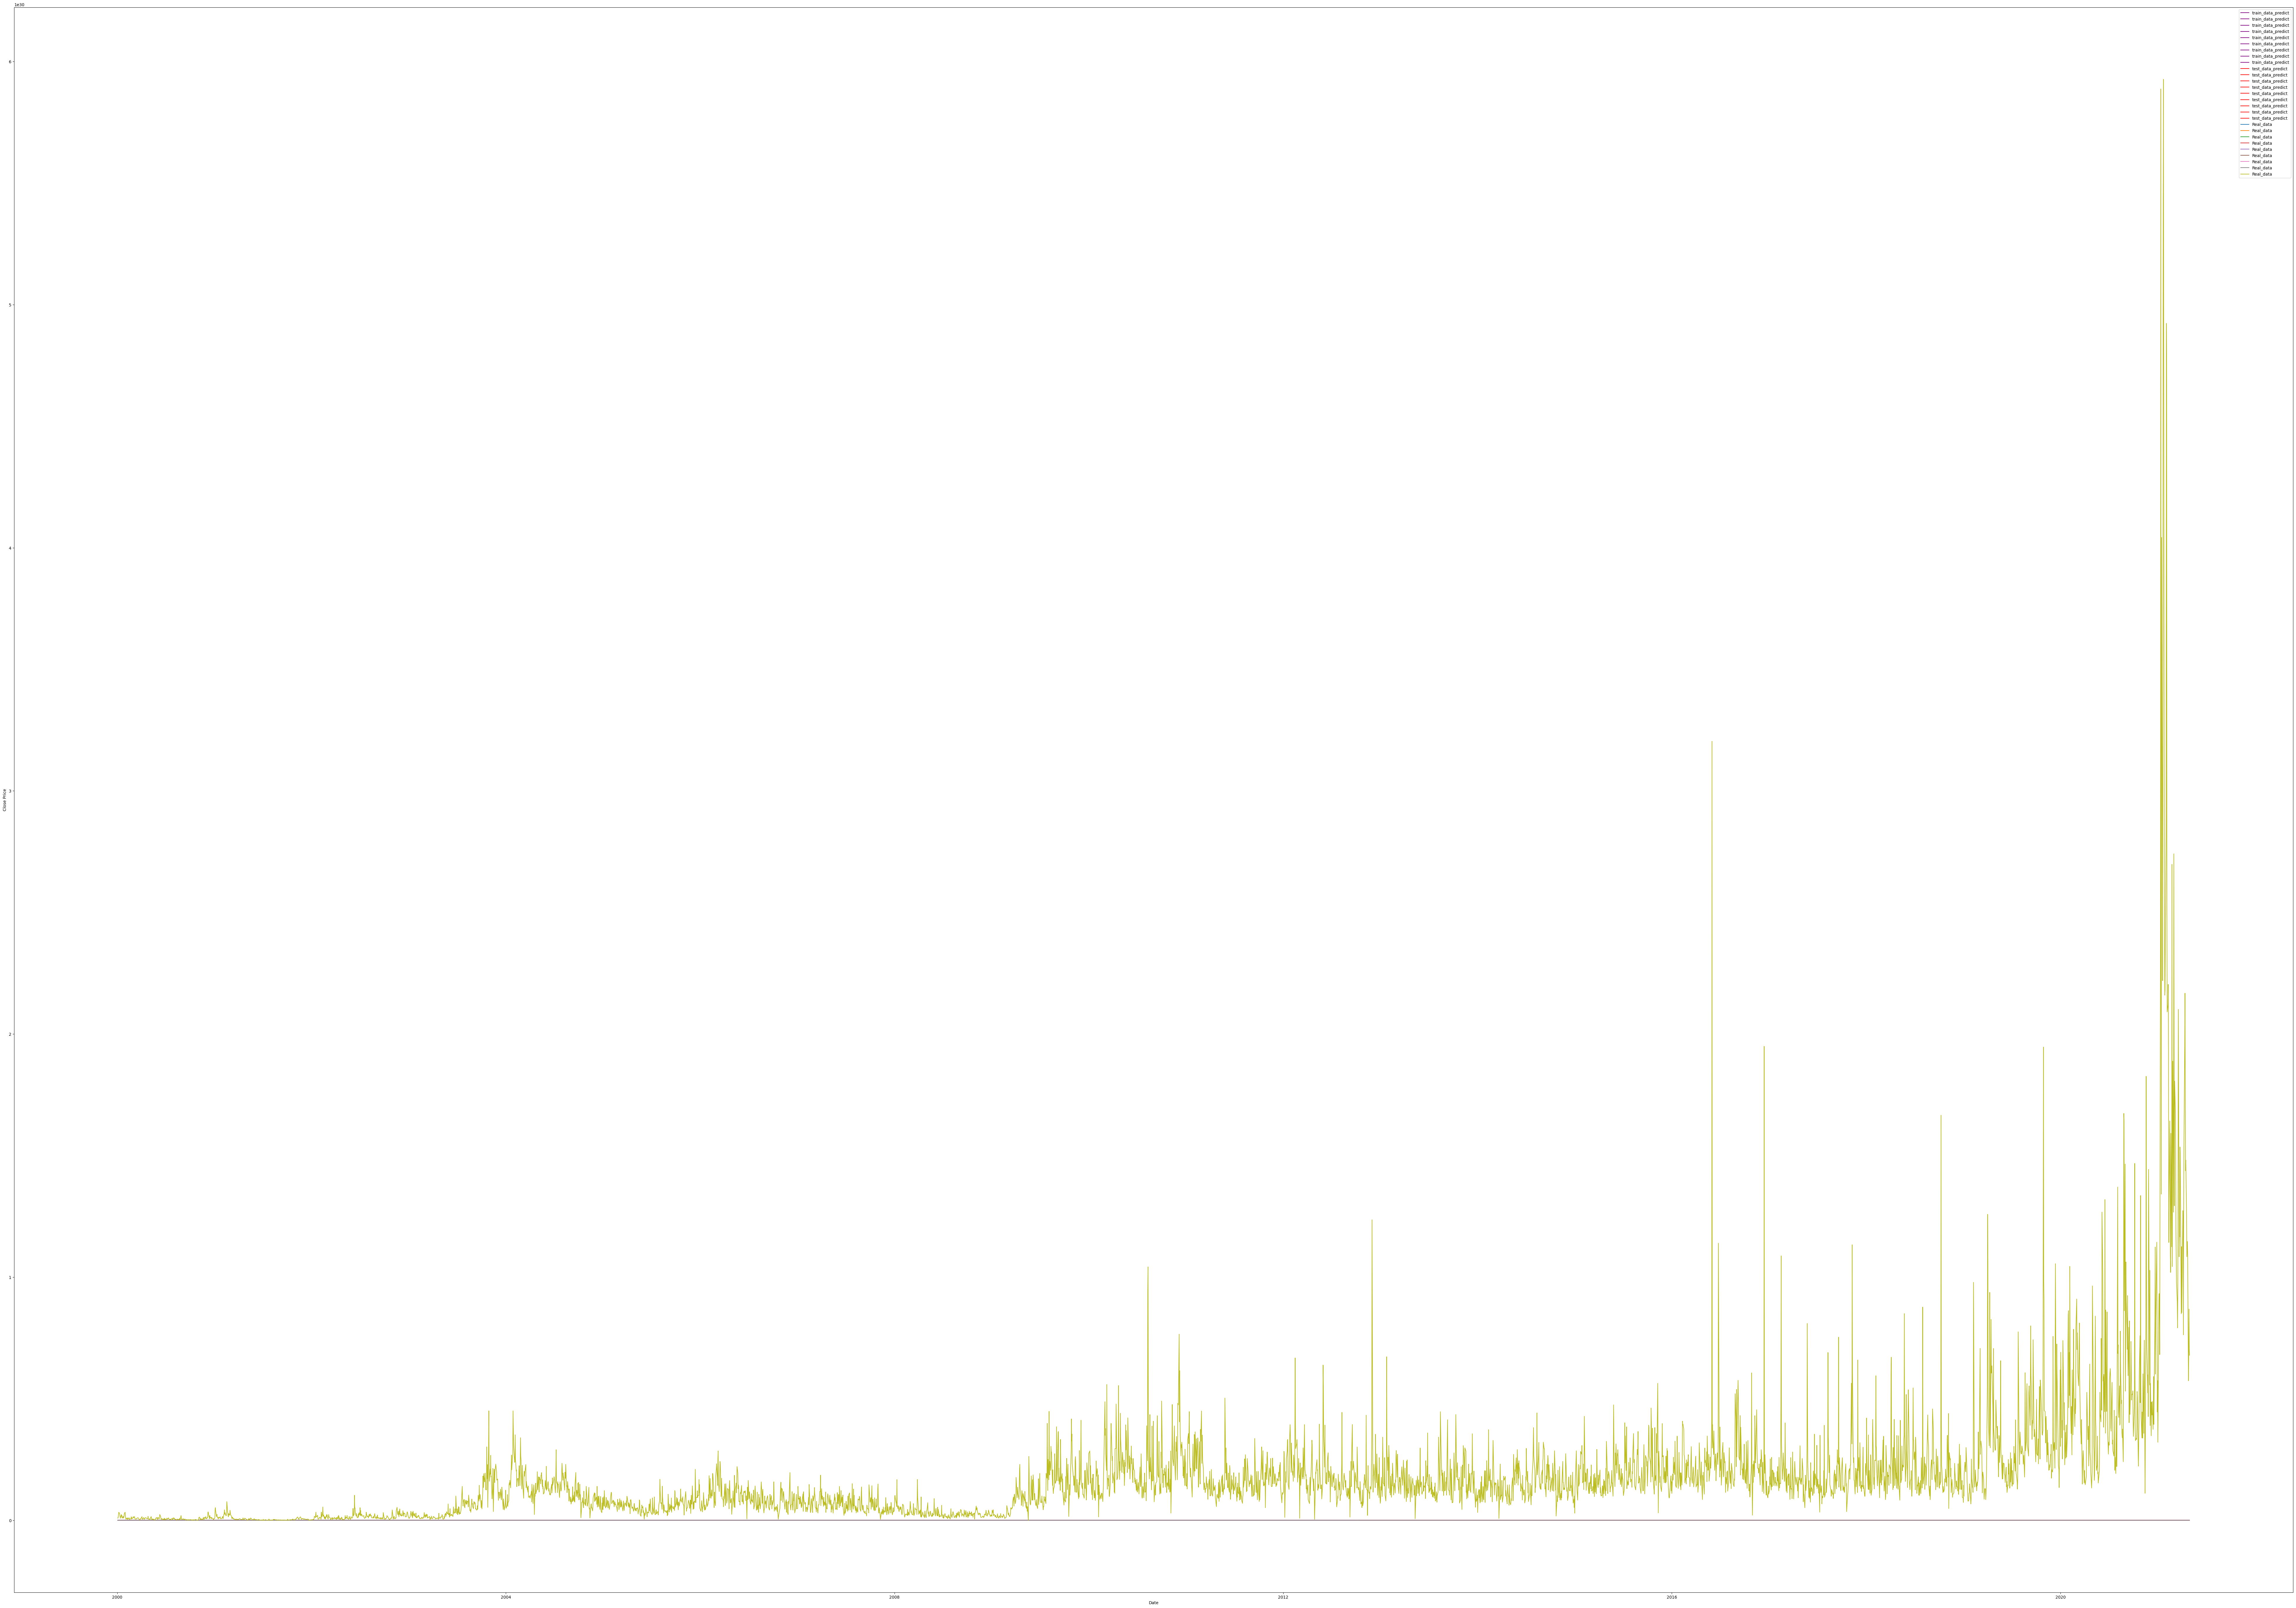

In [ ]:
dataframe1 = pd.read_csv('/content/TATAMOTORS.csv', usecols=['Date'], index_col=False)
#dataframe1 = dataframe1.iloc[::-1]

dataframe1 = dataframe1.reset_index(drop=True)
# dataframe = dataframe[dataframe.columns[::-1]]
dataframe1
plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),trainPredictPlot, color='purple',label='train_data_predict')
plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),testPredictPlot, color='red',label='test_data_predict')
plt.plot(pd.to_datetime(dataframe1['Date'], format= '%d-%m-%Y'),scaler.inverse_transform(dataset),label='Real_data')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.legend()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(100,70)

plt.show()

In [ ]:
# scaler.inverse_transform(dataset)
from sklearn.preprocessing import MinMaxScaler

# Assuming you have instantiated and fitted the MinMaxScaler object named 'scaler'
# Fit the scaler to your data...

# Print the shape of the MinMaxScaler object
print("Shape of MinMaxScaler:")
print("Minimum values shape:", scaler.data_min_.shape)
print("Maximum values shape:", scaler.data_max_.shape)


Shape of MinMaxScaler:
Minimum values shape: (9,)
Maximum values shape: (9,)


In [ ]:
# df_o = pd.DataFrame(scaler.inverse_transform(dataset), columns=["Close"])
result_o = pd.concat([dataframe1, df_o], axis=1)
result_o = result_o.reindex(dataframe1.index)


df_train = pd.DataFrame(trainPredictPlot, columns=["Close"])
result_train = pd.concat([dataframe1, df_train], axis=1)
result_train = result_train.reindex(dataframe1.index)

df_test = pd.DataFrame(testPredictPlot, columns=["Close"])
result_test = pd.concat([dataframe1, df_test], axis=1)
result_test = result_test.reindex(dataframe1.index)


plt.plot(pd.to_datetime(result_train['Date'].head(20), format= '%d-%m-%Y'), result_train['Close'].head(20), color='blue')
plt.plot(pd.to_datetime(result_o.head(20)['Date'], format= '%d-%m-%Y'), result_o.head(20)['Close'], color='green')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.show()

ValueError: ignored

In [ ]:
result_train.isna().sum()

In [ ]:
result_test.tail(24)

In [ ]:
plt.plot(testPredict)
plt.plot(testY)
plt.show()